In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r'C:\Users\Aanjney\Desktop\Deploy\Bangalore\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df['price'].value_counts()

price
75.00    310
65.00    302
55.00    275
60.00    270
45.00    240
        ... 
43.04      1
61.11      1
46.56      1
42.54      1
47.35      1
Name: count, Length: 1994, dtype: int64

In [7]:
for column in df.columns:
    print(df[column].value_counts())
    print("****" * 10)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
****************************************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
****************************************
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 130

In [8]:
print("\nColumns:", df.columns)


Columns: Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
df = df.drop(['area_type','society','balcony','availability'], axis='columns')
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df=df.dropna()

In [14]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13246, dtype: int64

In [15]:
df['location'].value_counts().head(10)

location
Whitefield               534
Sarjapur  Road           392
Electronic City          302
Kanakpura Road           266
Thanisandra              233
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: count, dtype: int64

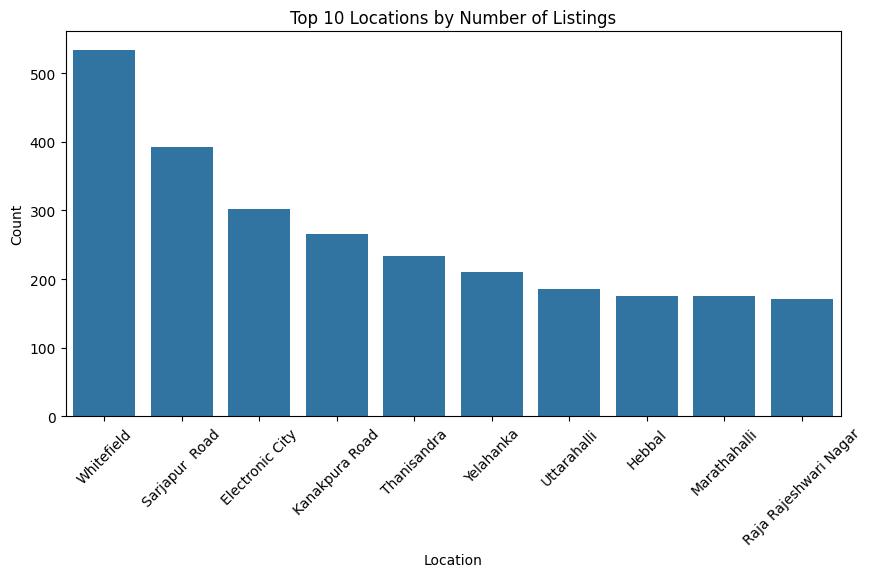

In [16]:
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=45)
plt.title('Top 10 Locations by Number of Listings')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

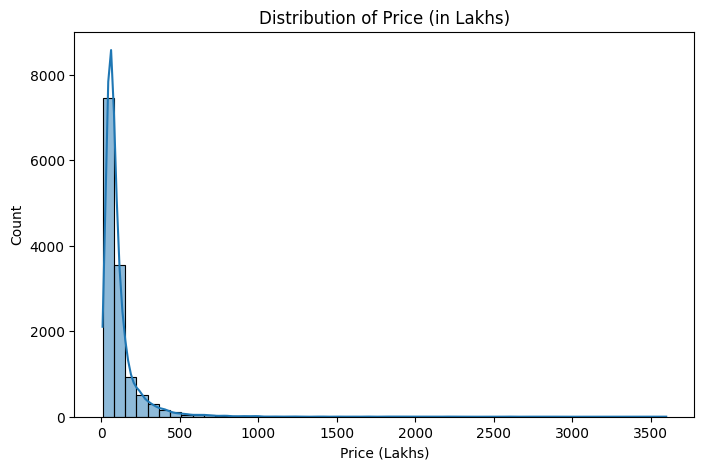

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price (in Lakhs)')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Count')
plt.show()

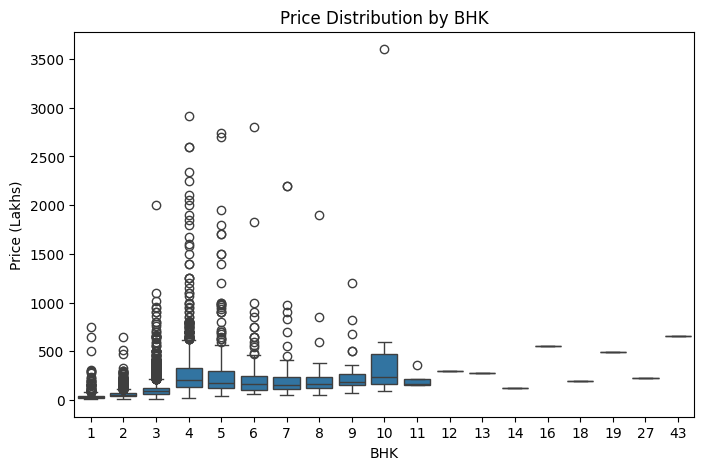

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='bhk', y='price', data=df)
plt.title('Price Distribution by BHK')
plt.xlabel('BHK')
plt.ylabel('Price (Lakhs)')
plt.show()



Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')


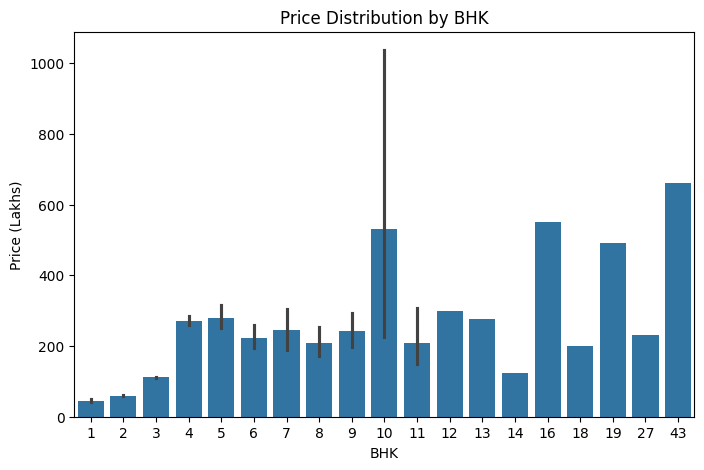

In [19]:
print(df.columns)
plt.figure(figsize=(8, 5))
sns.barplot(x='bhk', y='price', data=df.copy())
plt.title('Price Distribution by BHK')
plt.xlabel('BHK')
plt.ylabel('Price (Lakhs)')
plt.show()

In [20]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [21]:
df.shape

(13246, 6)

In [22]:
def convert_sqft_to_num(x):
    try:
        x = str(x)
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

In [23]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [24]:
df = df.dropna(subset=['total_sqft'])

print("After sqft conversion:", df.shape)

After sqft conversion: (13200, 6)


In [25]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [27]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
df['location'] = df['location'].apply(lambda x: x.strip())
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13200, dtype: object

In [29]:
location_counts = df['location'].value_counts()
location_counts

location
Whitefield                           533
Sarjapur  Road                       392
Electronic City                      304
Kanakpura Road                       264
Thanisandra                          235
                                    ... 
Zuzuvadi                               1
Chellikere                             1
Jakkasandra                            1
Gulakamale                             1
Beml layout, Rajarajeshwari nagar      1
Name: count, Length: 1287, dtype: int64

In [30]:
rare_locations = location_counts[location_counts <= 10].index
rare_locations

Index(['Ganga Nagar', 'Kalkere', 'Dairy Circle', '1st Block Koramangala',
       'Sector 1 HSR Layout', 'Basapura', 'Gunjur Palya', 'BTM 1st Stage',
       'Nagadevanahalli', 'Sadashiva Nagar',
       ...
       '3rd Stage Raja Rajeshwari Nagar', 'Mallappa Layout', 'Sindhi Colony',
       'Masjid e Alkareem', 'Kanakapura main  Road', 'Zuzuvadi', 'Chellikere',
       'Jakkasandra', 'Gulakamale', 'Beml layout, Rajarajeshwari nagar'],
      dtype='object', name='location', length=1047)

In [31]:
df['location'] = df['location'].apply(lambda x: 'other' if x in rare_locations else x)

df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

In [32]:
print("Unique locations:", len(df['location'].unique()))

Unique locations: 241


In [33]:
df = df[df['total_sqft'] / df['bhk'] >= 300]

print("After removing low sqft per BHK:", df.shape)

After removing low sqft per BHK: (12456, 7)


In [34]:
def remove_pps_outliers(df):
    cleaned_df = pd.DataFrame()

    
    for location, group in df.groupby('location'):
        mean = group['price_per_sqft'].mean()
        std = group['price_per_sqft'].std()

        
        filtered = group[(group['price_per_sqft'] > (mean - std)) &
                         (group['price_per_sqft'] <= (mean + std))]

        cleaned_df = pd.concat([cleaned_df, filtered], ignore_index=True)

    return cleaned_df


df = remove_pps_outliers(df)

print("After removing price_per_sqft outliers:", df.shape)

After removing price_per_sqft outliers: (10293, 7)


In [35]:
def remove_bhk_outliers(df):
    indices_to_remove = []  

    
    for location, location_df in df.groupby('location'):
        
        bhk_price_stats = {}

        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_price_stats[bhk] = {
                'mean_price': bhk_df['price_per_sqft'].mean(),
                'std_dev': bhk_df['price_per_sqft'].std(),
                'count': bhk_df.shape[0]
            }

        
        for bhk, bhk_df in location_df.groupby('bhk'):
            lower_bhk_stats = bhk_price_stats.get(bhk - 1)
            if lower_bhk_stats and lower_bhk_stats['count'] > 5:
                
                bad_bhk = bhk_df[bhk_df['price_per_sqft'] < lower_bhk_stats['mean_price']]
                indices_to_remove.extend(bad_bhk.index)

    
    return df.drop(indices_to_remove, axis='index')


df = remove_bhk_outliers(df)

print("After removing BHK outliers:", df.shape)

After removing BHK outliers: (7365, 7)


In [36]:
df = df[df['bath'] < df['bhk'] + 2]

print("After removing bathroom outliers:", df.shape)

After removing bathroom outliers: (7286, 7)


In [37]:
df_model = df.drop(['size', 'price_per_sqft'], axis=1)
df_model.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [38]:
df['location'].unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [39]:
dummies = pd.get_dummies(df_model['location'], dtype=int)
df_model = pd.concat([df_model.drop('location', axis=1), dummies.drop('other', axis=1)], axis=1)

print("Final shape after encoding:", df_model.shape)

Final shape after encoding: (7286, 244)


In [40]:
df_model.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X = df_model.drop('price', axis=1)
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (5828, 243)
X_test shape: (1458, 243)


In [42]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred)

print("Linear Regression R² Score:", round(lr_r2, 3))

Linear Regression R² Score: 0.855


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest R² Score:", round(rf_r2, 3))


Random Forest R² Score: 0.84


In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost R² Score:", round(xgb_r2, 3))

XGBoost R² Score: 0.859


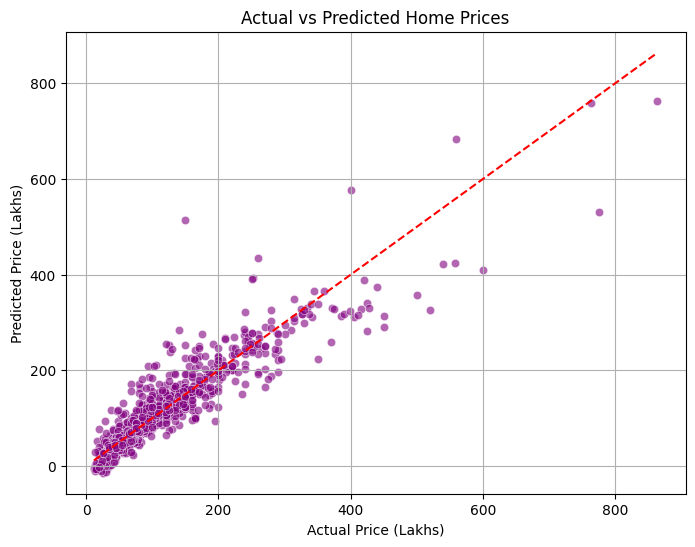

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.title('Actual vs Predicted Home Prices')
plt.grid(True)
plt.show()

In [46]:
import joblib

joblib.dump(lr_model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [47]:
from sklearn.linear_model import Ridge, Lasso

In [48]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression R² Score:", round(ridge_r2, 3))

Ridge Regression R² Score: 0.856


In [49]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression R² Score:", round(lasso_r2, 3))

Lasso Regression R² Score: 0.821


In [50]:
import joblib

joblib.dump(xgb_model, 'xgboost_model.pkl')

print("XGBoost model saved successfully to 'xgboost_model.pkl'")

XGBoost model saved successfully to 'xgboost_model.pkl'
